In [1]:
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pickle
import json
import nltk

def tokenize(sequence):
    tokens = [token.replace("``", '"').replace("''", '"') for token in nltk.word_tokenize(sequence)]
    return tokens


In [62]:
fileBidaf = 'preds-gen-bidaf'
fileSelf1 = 'preds-gen-self1'
fileSelf2 = 'preds-gen-self2'
filePreds = 'preds-gen-preds'
fileTrue = 'preds-gen'
bdict = json.load(open(fileBidaf, 'r'))
sdict1 = json.load(open(fileSelf1, 'r'))
sdict2 = json.load(open(fileSelf2, 'r'))
pdict = json.load(open(filePreds, 'r'))
adict = json.load(open(fileTrue, 'r'))

qFile = 'data/tiny-dev.json'
data = json.load(open(qFile, 'r'))
paras = data['data'][0]['paragraphs']
para = paras[1]

In [120]:
def createHeatmap(data, xlabel, ylabel, figsize=(40, 3)):
#     fig, ax = plt.subplots()
    plt.figure(dpi=200, facecolor='white', figsize=figsize)
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='on',         # ticks along the top edge are off
    labelbottom='on', # labels along the bottom edge are off
    labeltop='on') # labels along the bottom edge are off
    
    plt.imshow(data, cmap='Blues', interpolation='nearest')
    plt.yticks(np.arange(len(ylabel)), ylabel)
    plt.xticks(np.arange(len(xlabel)), xlabel, rotation='vertical')
    return plt

56be4e1facb8001400a502f9


/home/anandd/.local/lib/python3.5/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


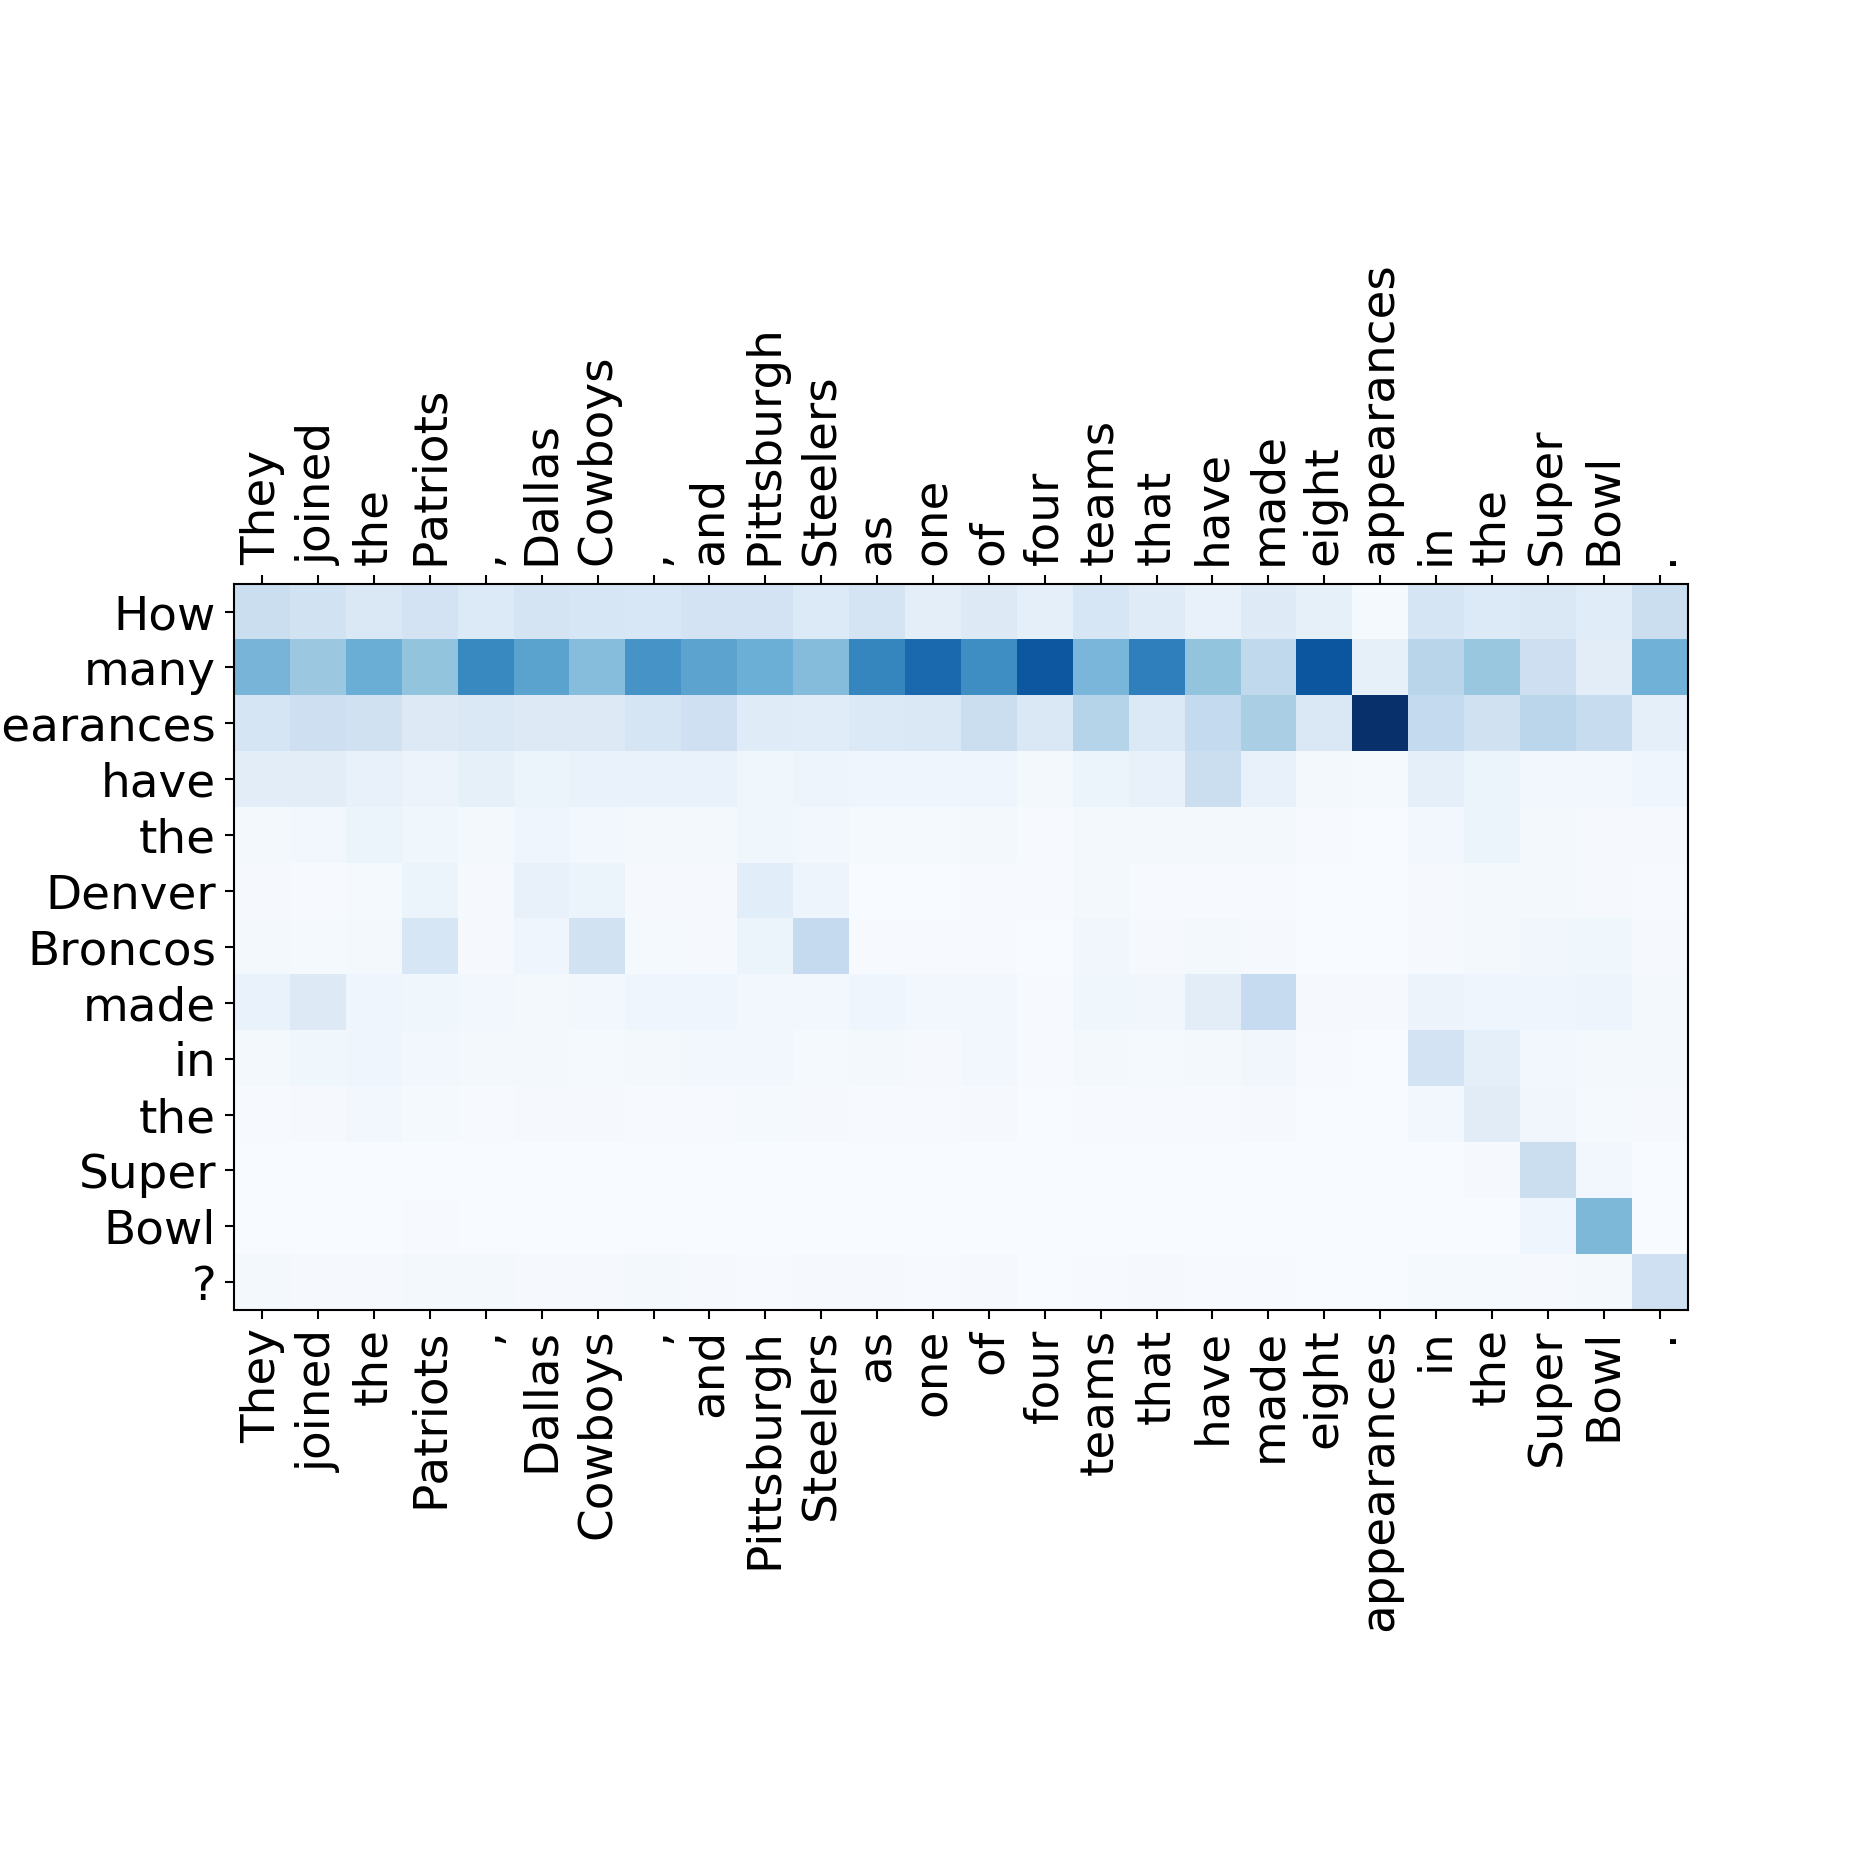

<IPython.core.display.Javascript object>


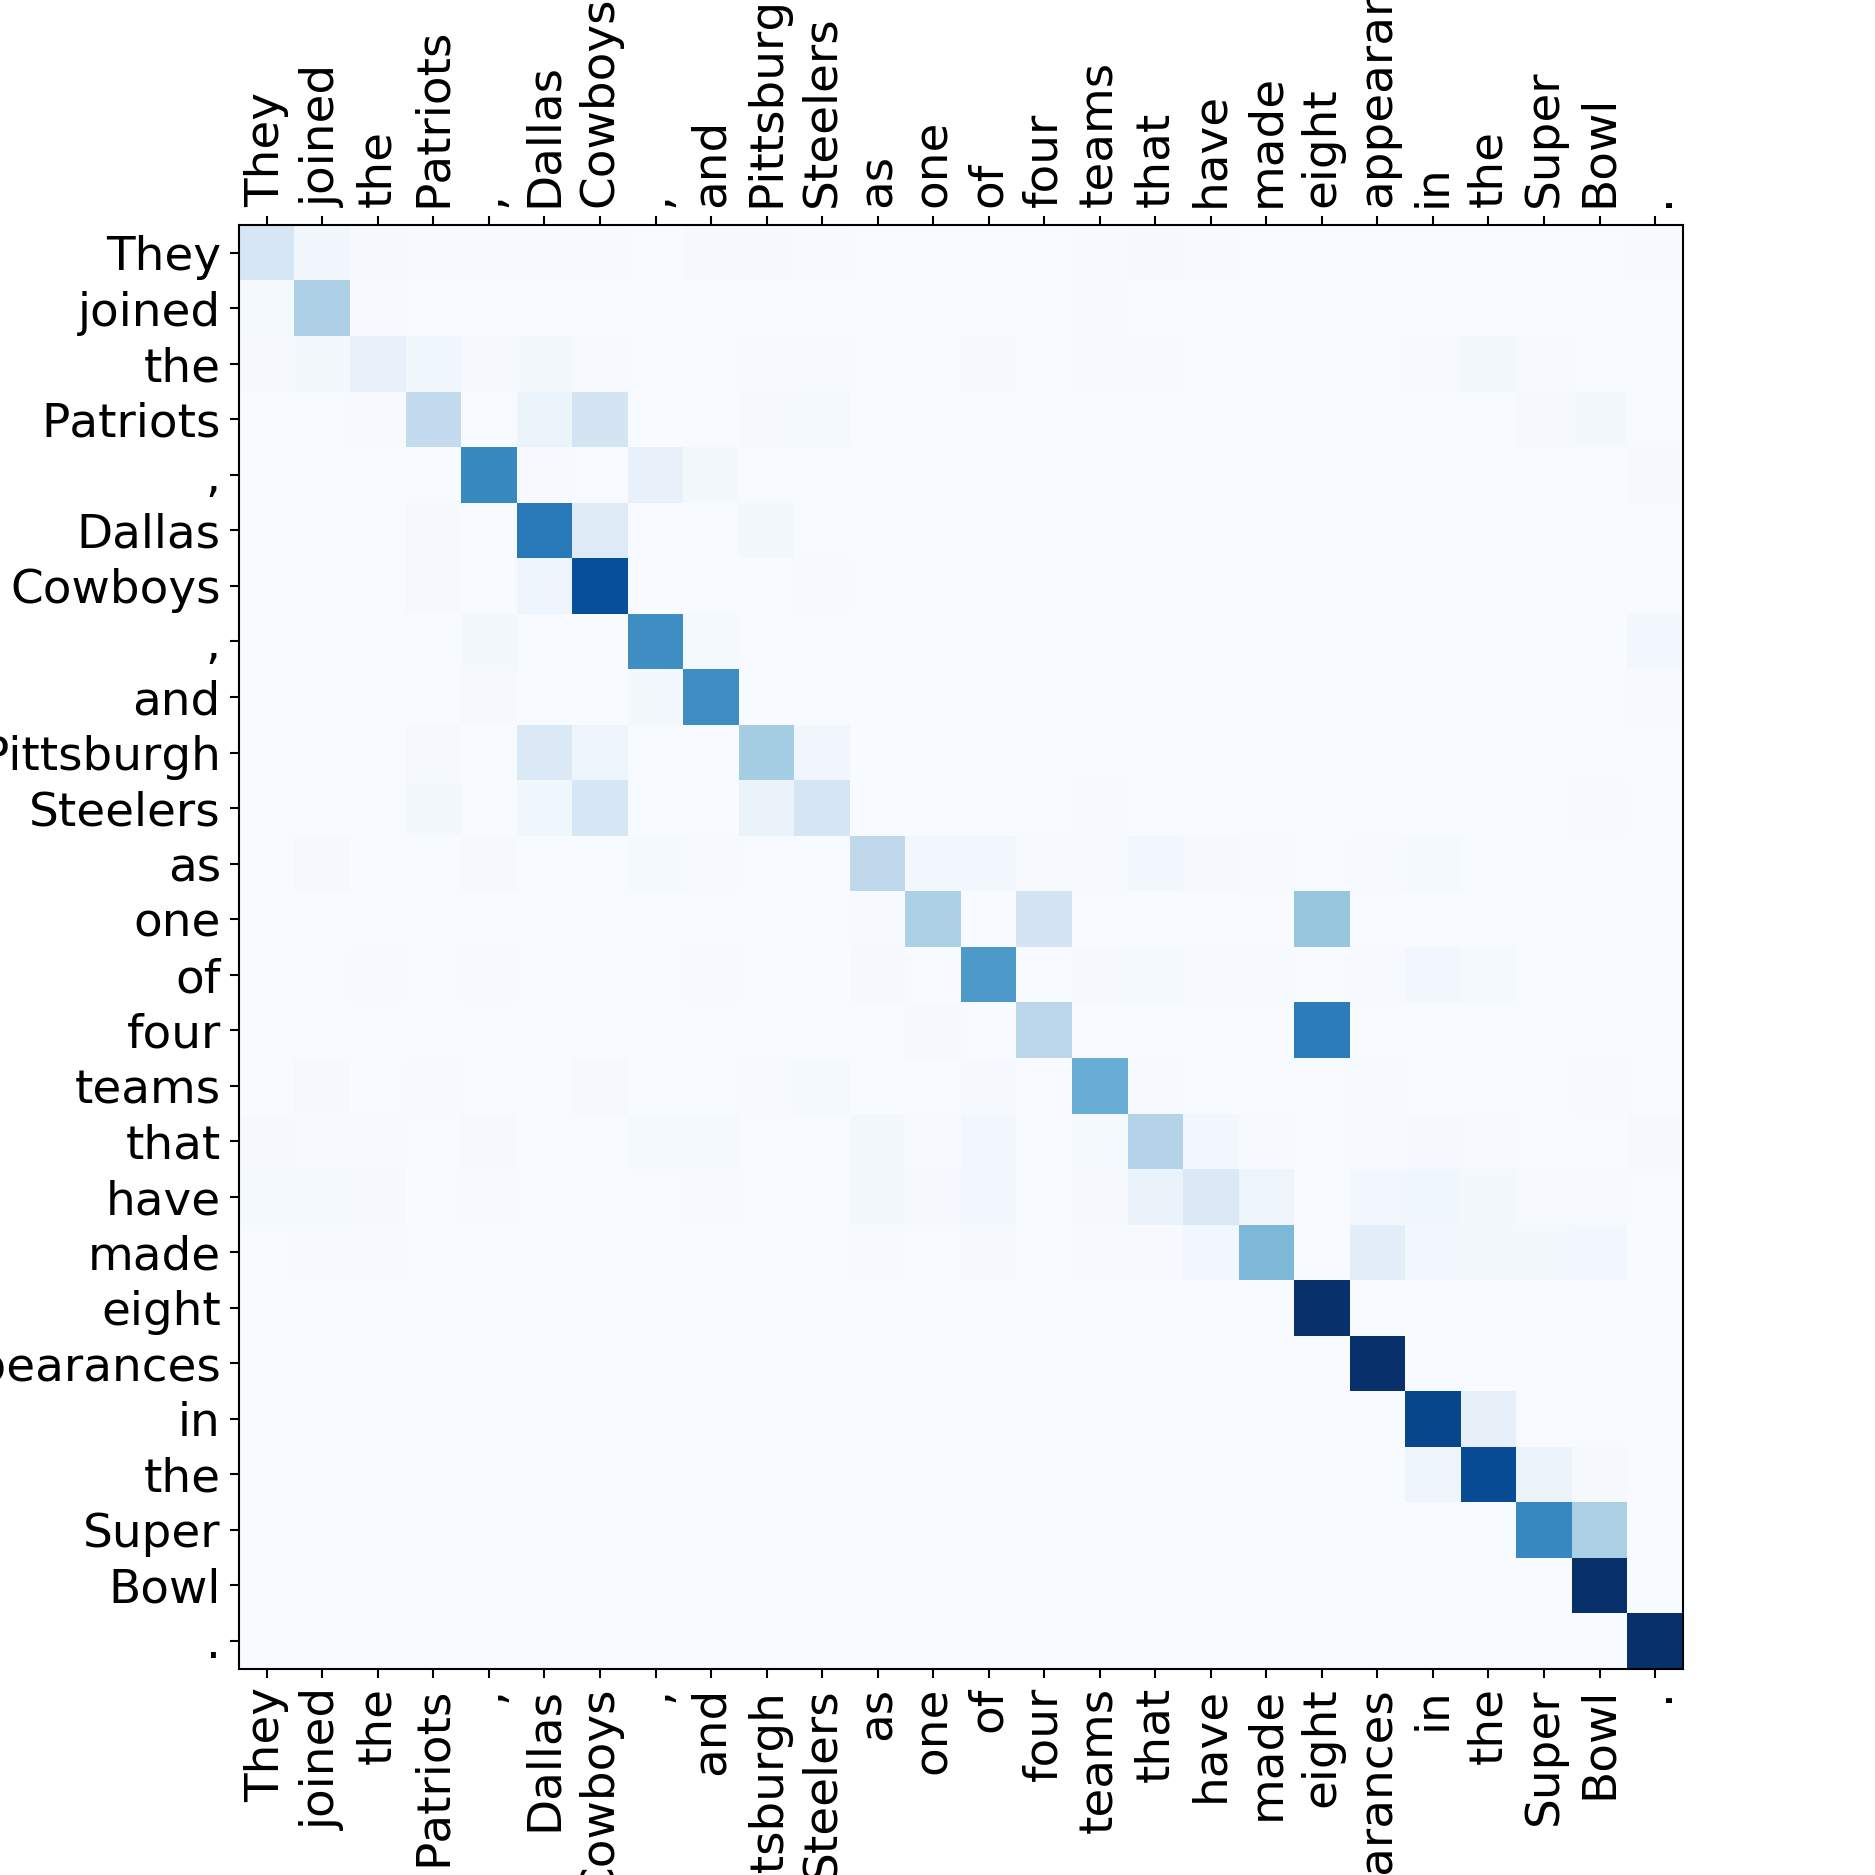

<IPython.core.display.Javascript object>


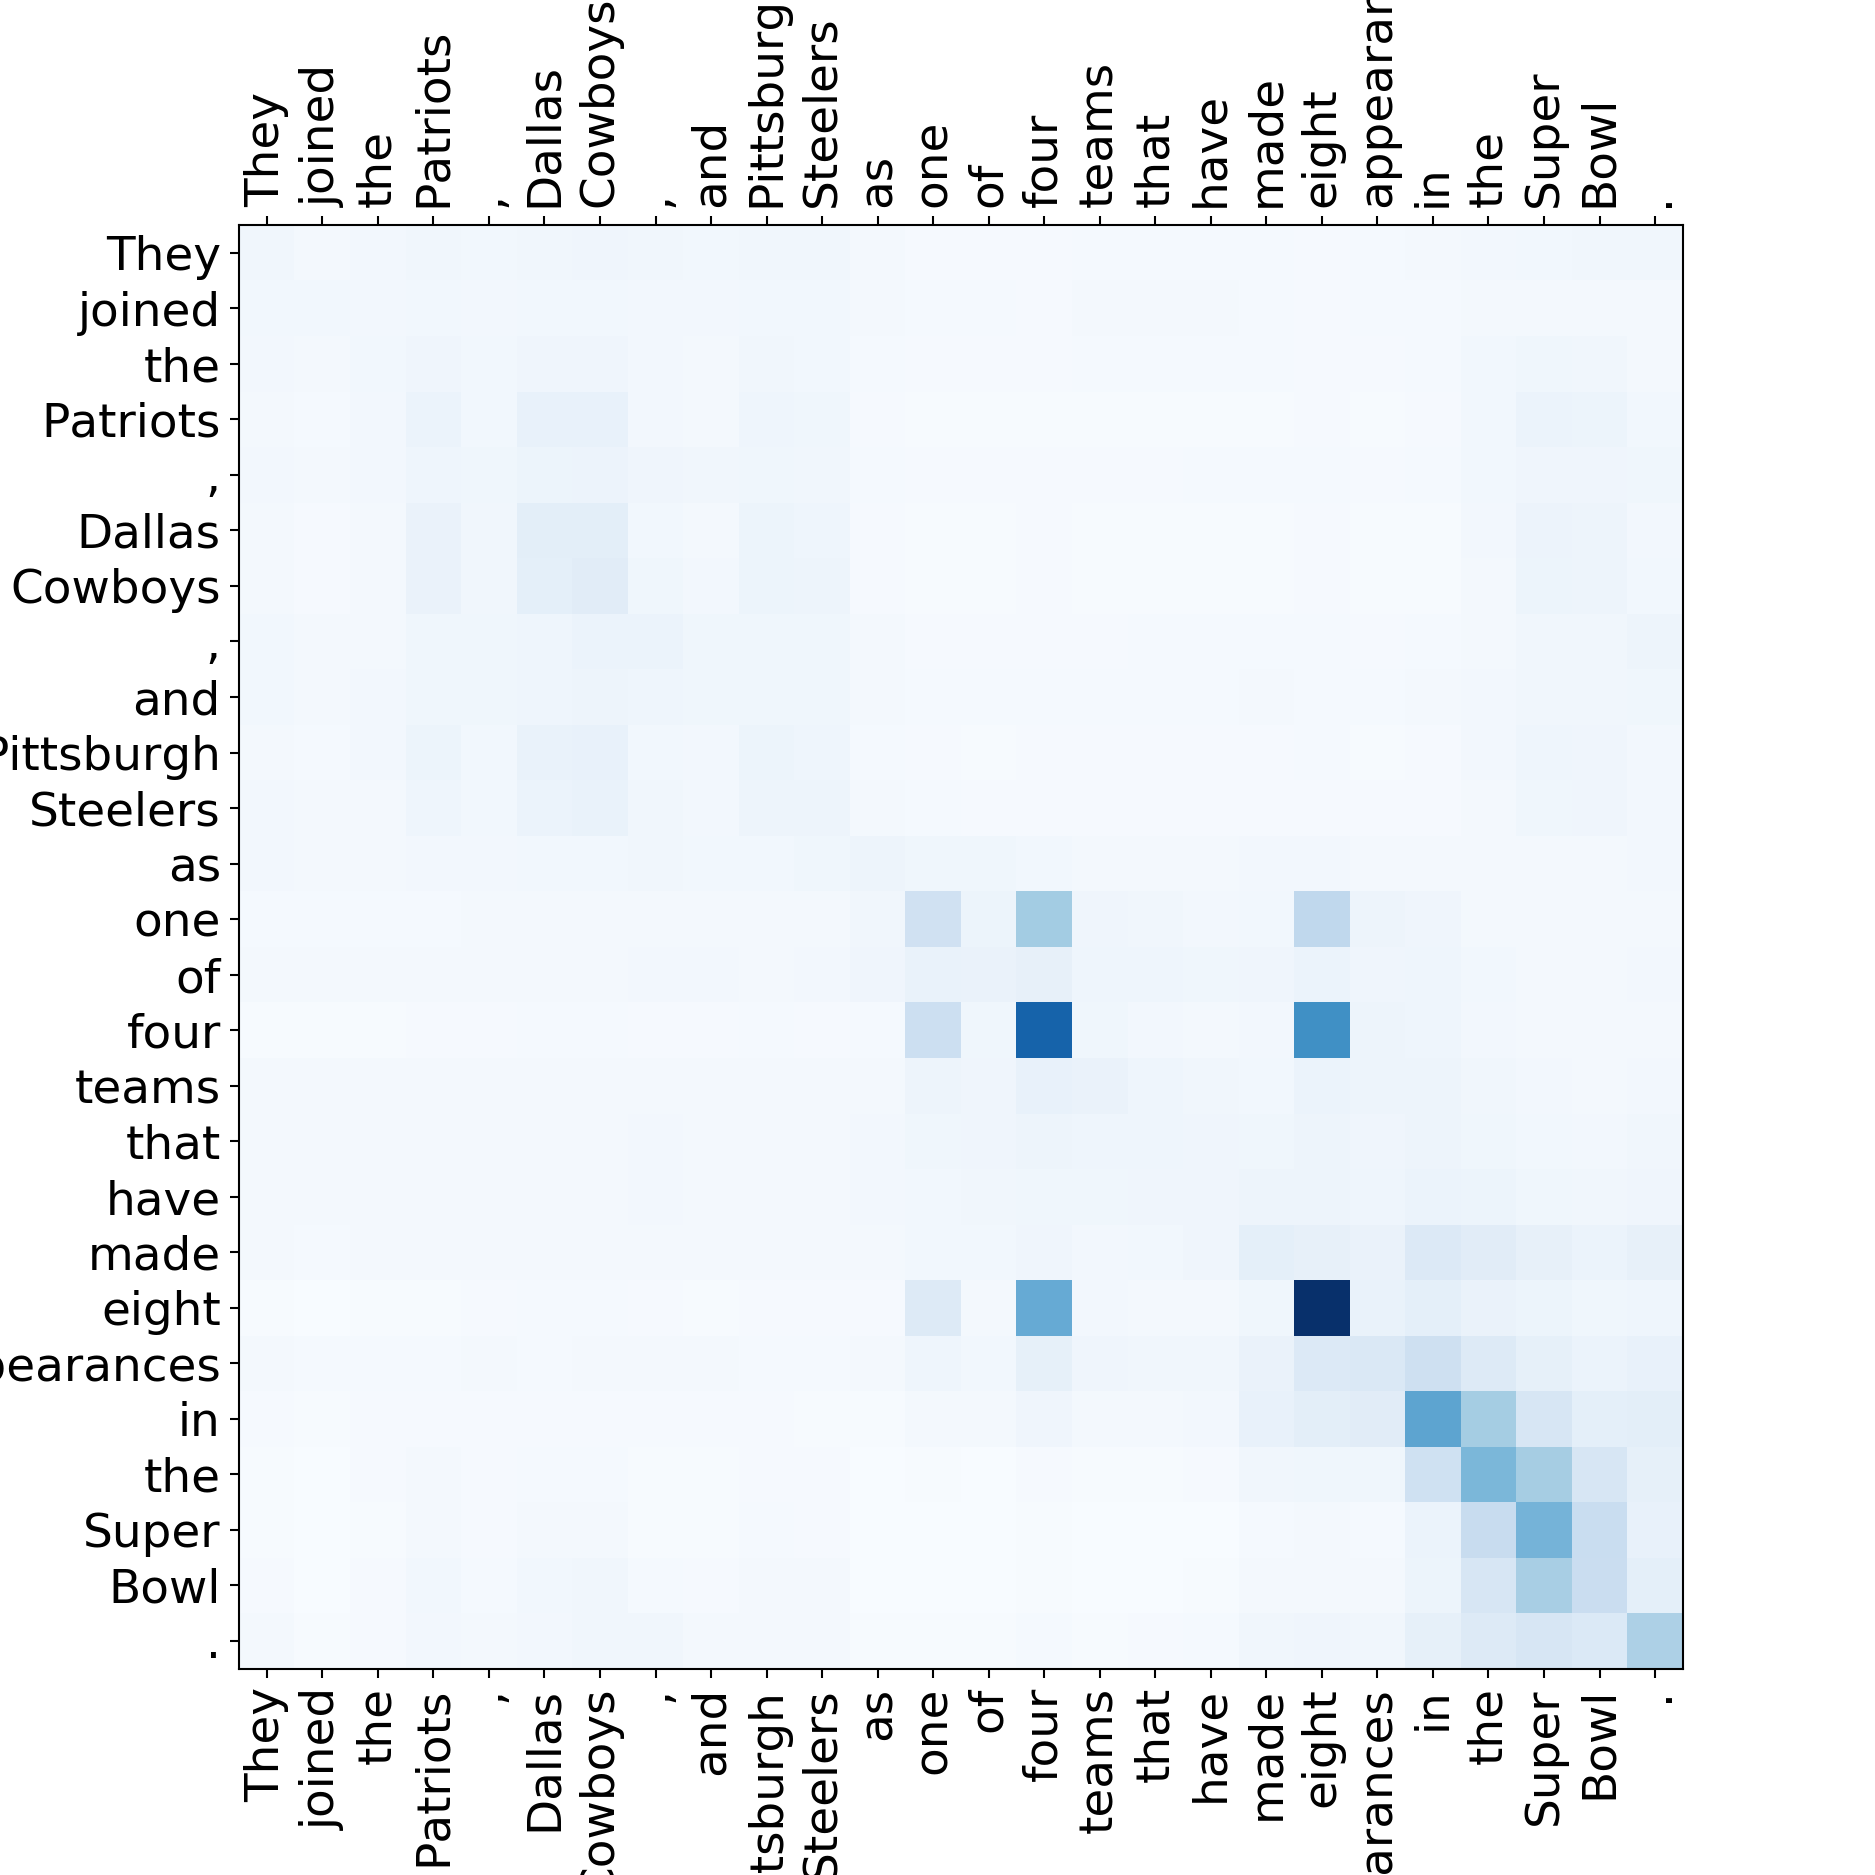

(2, 26) 26


<IPython.core.display.Javascript object>


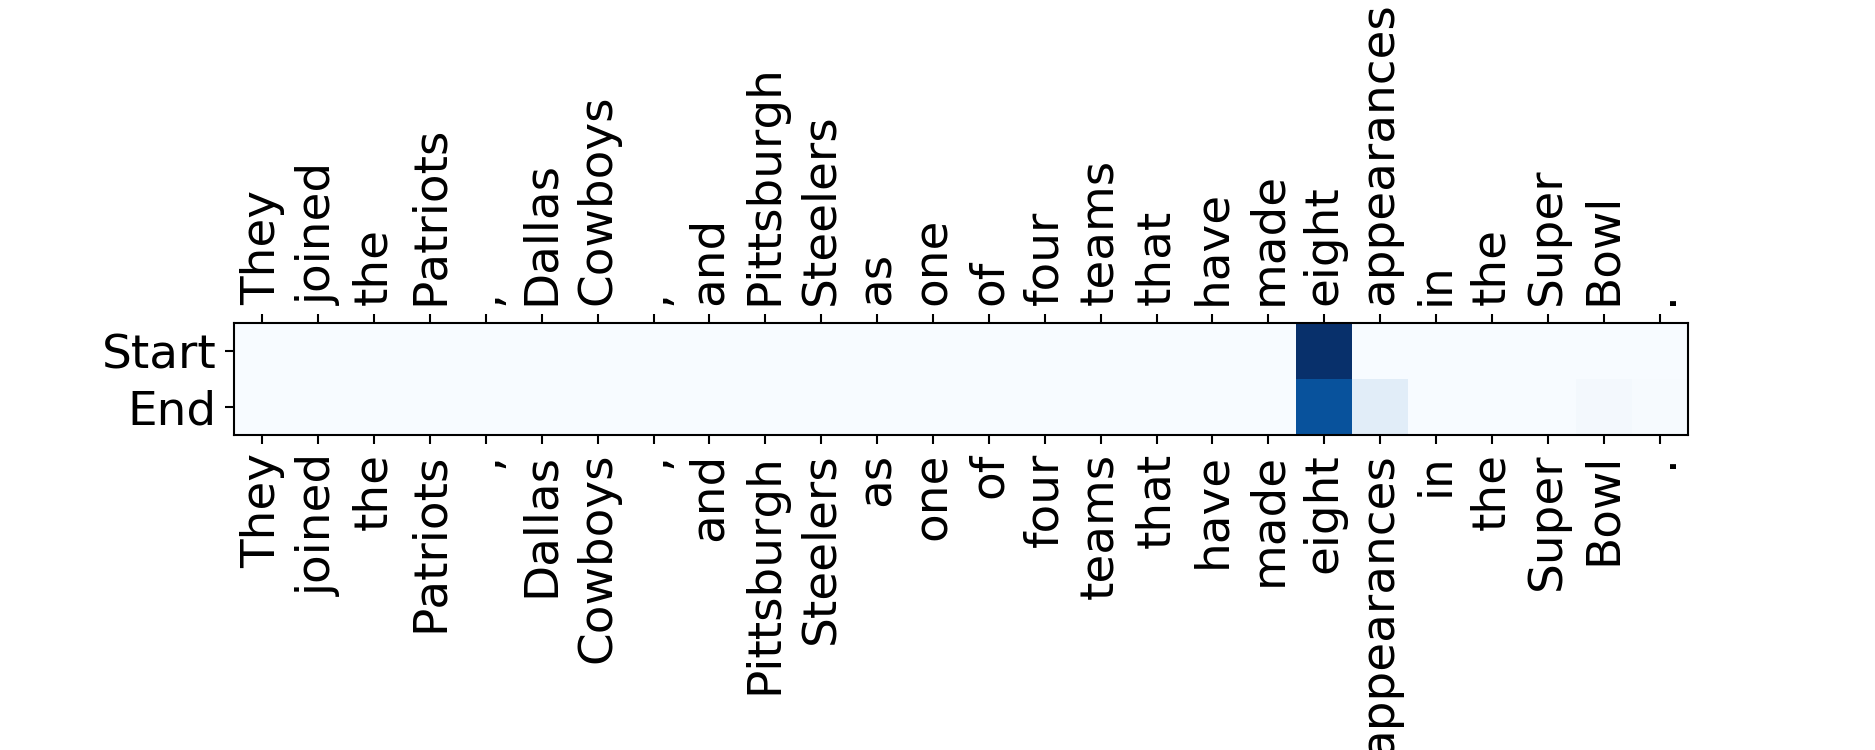

In [121]:
matplotlib.rcParams.update({'font.size': 18})

c1 = para['context']
qlist = para['qas']
keypos = 1
q = qlist[keypos]['question']
k = qlist[keypos]['id']
print(k)
c = tokenize(c1)[90:116]
q = tokenize(q)

bidafsim = np.array(bdict[k])[90:116, :]
bidafsim = bidafsim[:len(c), :len(q)]
# plt = createHeatmap(bidafsim, q, c, (7, 10))
plt = createHeatmap(bidafsim.transpose(), c, q, (10, 10))
plt.show()

selfsim = np.array(sdict1[k])[90:116, 90:116]
selfsim = selfsim[:len(c), :len(c)]
plt = createHeatmap(selfsim, c, c, (10, 10))
plt.show()

selfsim = np.array(sdict2[k])[90:116, 90:116]
selfsim = selfsim[:len(c), :len(c)]
plt = createHeatmap(selfsim, c, c, (10, 10))
plt.show()

pred_start, pred_end = np.array(pdict[k][0][90:116]), np.array(pdict[k][1][90:116])
preds = np.vstack([pred_start, pred_end])
print(preds.shape, len(c))
# preds = preds[:, :len(c)]
# plt = createHeatmap(preds.transpose(), ['Start', 'End'], c, (2, 10))
plt = createHeatmap(preds, c, ['Start', 'End'], (10, 4))
plt.show()

In [50]:
c1 = para['context']
adict[k], qlist[keypos]['answers']

("Levi's Stadium",
 [{'answer_start': 403, 'text': 'Santa Clara, California.'},
  {'answer_start': 355, 'text': "Levi's Stadium"},
  {'answer_start': 355, 'text': "Levi's Stadium"}])

In [88]:
len(c)

26